<a href="https://colab.research.google.com/github/Triciapolor/Fashion-Data-project/blob/main/Fashion_trend.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/10
1875/1875 [==============================] - 72s 38ms/step - loss: 0.4662 - accuracy: 0.8286 - val_loss: 0.3452 - val_accuracy: 0.8747
Epoch 2/10
1875/1875 [==============================] - 70s 37ms/step - loss: 0.3014 - accuracy: 0.8881 - val_loss: 0.2890 - val_accuracy: 0.8957
Epoch 3/10
1875/1875 [==============================] - 67s 36ms/step - loss: 0.2540 - accuracy: 0.9058 - val_loss: 0.2757 - val_accuracy: 0.8992
Epoch 4/10
1875/1875 [==============================] - 69s 37ms/step - loss: 0.2202 - accuracy: 0.9178 - val_loss: 0.2685 - val_accuracy: 0.9063
Epoch 5/10
1875/1875 [==============================] - 69s 37ms/step - loss: 0.1942 - accuracy: 0.9272 - val_loss: 0.2711 - val_accuracy: 0.9014
Epoch 6/10
1875/1875 [==============================] - 67s 36ms/step - loss: 0.1717 - accuracy: 0.9351 - val_loss: 0.2572 - val_accuracy: 0.9081
Epoch 7/10
1875/1875 [==============================] - 70s 37ms/step - loss: 0.1503 - accuracy: 0.9436 - val_loss: 0.2849 -

Text(0.5, 1.0, 'Predicted category: 9')

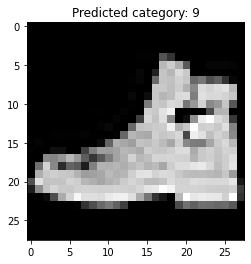

In [5]:
# Importing the necessary libraries
import tensorflow as tf

# Loading the Fashion-MNIST dataset downloadable from tensorflow
data = tf.keras.datasets.fashion_mnist.load_data()
(X_train, y_train), (X_test, y_test) = data

# Normalising the pixel value for the maximum allowes, in this case it will be 8-bit
X_train = X_train / 255.0
X_test = X_test / 255.0
# Defining a CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(128, (3,3), activation="relu"),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compiling the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Training the model on the Fashion-MNIST dataset
model.fit(X_train.reshape(-1,28,28,1), y_train, epochs=10, validation_data=(X_test.reshape(-1,28,28,1), y_test))
import numpy as np
import matplotlib.pyplot as plt

# Using a random image from the test set
index = np.random.randint(0, len(X_test))
image = X_test[index].reshape(28,28)

# Making a prediction using the trained model
prediction = model.predict(image.reshape(1,28,28,1))[0]
category = np.argmax(prediction)

# Ploting the image and prediction result
fig, ax = plt.subplots()
ax.imshow(image, cmap="gray")
ax.set_title(f"Predicted category: {category}")